In [407]:
from random import random
from math import sqrt
#estimator for exp(x) without control variate
def yr(start,eps):
    return 1 + start* yr(random()*start,eps) if start>eps else 1

#estimator for exp(x) with control variate 1 + x 
def yrs(start,eps):
    if start<eps:
        return 1+start + start**2/2
    else:
        s = random()*start
        return 1+ start + start**2/2 + start*(yrs(s,eps)-1-s)

#estimator for exp(x) with control variate 1 +x+x**2/2 
def yrr(start,eps):
    if start<eps:
        return 1+start + start**2/2 + start**3/6
    else:
        s = random()*start
        return 1+ start + start**2/2 + start**3/6+ start*(yrs(s,eps)-1-s-s**2/2)

def f(fun,start,eps=0.01,nsim=1000):
    res = 0
    for _ in range(nsim):
        res +=fun(start,eps)/nsim
    return res


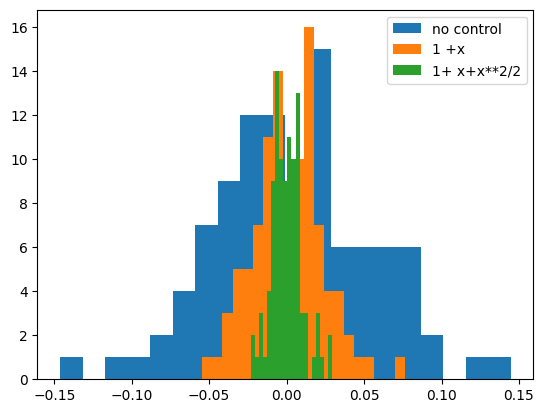

In [444]:
from math import exp
import matplotlib.pyplot as plt
tmp1=[]
for _ in range(100):
    tmp1.append(f(yr,1, 0.0001,100)-exp(1))

tmp2=[]
for _ in range(100):
    tmp2.append(f(yrs,1, 0.0001,100)-exp(1))

tmp3=[]
for _ in range(100):
    tmp3.append(f(yrr,1, 0.0001,100)-exp(1))

plt.hist(tmp1, bins = 20, label= "no control")
plt.hist(tmp2, bins = 20, label= "1 +x")
plt.hist(tmp3, bins = 20, label= "1+ x+x**2/2")
plt.legend()
plt.show()
    